# Load Dataframes


In [1]:
import pandas as pd

In [16]:
df = pd.read_csv("TG_STAID000082.txt", skiprows=20, parse_dates=["    DATE"])

In [17]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,82,317,1925-01-01,-131,0
1,82,317,1925-01-02,-71,0
2,82,317,1925-01-03,-15,0
3,82,317,1925-01-04,21,0
4,82,317,1925-01-05,1,0
...,...,...,...,...,...
35575,82,317,2022-05-27,-9999,9
35576,82,317,2022-05-28,-9999,9
35577,82,317,2022-05-29,-9999,9
35578,82,317,2022-05-30,-9999,9


# Show Certain Rows


In [19]:
df[10:20]


,STAID,SOUID,DATE,TG,Q_TG
10,82,317,1925-01-11,-139,0
11,82,317,1925-01-12,-214,0
12,82,317,1925-01-13,-187,0
13,82,317,1925-01-14,-10,0
14,82,317,1925-01-15,-7,0
15,82,317,1925-01-16,5,0
16,82,317,1925-01-17,2,0
17,82,317,1925-01-18,-29,0
18,82,317,1925-01-19,-4,0
19,82,317,1925-01-20,-51,0


# Show Certain Columns

In [20]:
df["   TG"]

0        -131
1         -71
2         -15
3          21
4           1
         ... 
35575   -9999
35576   -9999
35577   -9999
35578   -9999
35579   -9999
Name:    TG, Length: 35580, dtype: int64

In [22]:
df[["   TG", "    DATE"]]

,TG,DATE
0,-131,1925-01-01
1,-71,1925-01-02
2,-15,1925-01-03
3,21,1925-01-04
4,1,1925-01-05
...,...,...
35575,-9999,2022-05-27
35576,-9999,2022-05-28
35577,-9999,2022-05-29
35578,-9999,2022-05-30


# Simple Statistics and Filtering

In [28]:
df.loc[df['   TG'] != -9999]['   TG'].max()/10



29.5

In [29]:
df.loc[df['   TG'] != -9999]['   TG'].min()/10



-42.2

<AxesSubplot: >

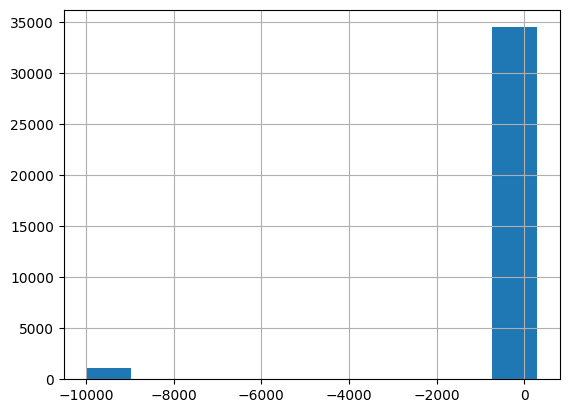

In [30]:
df['   TG'].hist()


<AxesSubplot: >

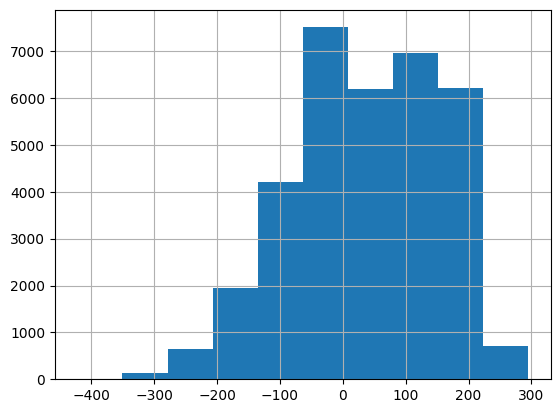

In [31]:
df.loc[df['   TG'] != -9999]['   TG'].hist()

# Get Certain cells

In [32]:
df


,STAID,SOUID,DATE,TG,Q_TG
0,82,317,1925-01-01,-131,0
1,82,317,1925-01-02,-71,0
2,82,317,1925-01-03,-15,0
3,82,317,1925-01-04,21,0
4,82,317,1925-01-05,1,0
...,...,...,...,...,...
35575,82,317,2022-05-27,-9999,9
35576,82,317,2022-05-28,-9999,9
35577,82,317,2022-05-29,-9999,9
35578,82,317,2022-05-30,-9999,9


In [41]:
df.loc[df['    DATE']=="1967-11-05"]['   TG'].squeeze() / 10

3.4

In [43]:
df.loc[df['   TG']==df['   TG'].max()]['    DATE'].squeeze()

Timestamp('2010-07-26 00:00:00')

# Calculate a new column out of existing column

In [46]:
import numpy as np
df["TG0"]=df['   TG'].mask(df['   TG']==-9999, np.nan)
df

,STAID,SOUID,DATE,TG,Q_TG,TG,TG0
0,82,317,1925-01-01,-131,0,-13.1,-131.0
1,82,317,1925-01-02,-71,0,-7.1,-71.0
2,82,317,1925-01-03,-15,0,-1.5,-15.0
3,82,317,1925-01-04,21,0,2.1,21.0
4,82,317,1925-01-05,1,0,0.1,1.0
...,...,...,...,...,...,...,...
35575,82,317,2022-05-27,-9999,9,-999.9,NaN
35576,82,317,2022-05-28,-9999,9,-999.9,NaN
35577,82,317,2022-05-29,-9999,9,-999.9,NaN
35578,82,317,2022-05-30,-9999,9,-999.9,NaN


In [48]:
df["TG"]=df['TG0']/10

In [49]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,TG0
0,82,317,1925-01-01,-131,0,-13.1,-131.0
1,82,317,1925-01-02,-71,0,-7.1,-71.0
2,82,317,1925-01-03,-15,0,-1.5,-15.0
3,82,317,1925-01-04,21,0,2.1,21.0
4,82,317,1925-01-05,1,0,0.1,1.0
...,...,...,...,...,...,...,...
35575,82,317,2022-05-27,-9999,9,NaN,NaN
35576,82,317,2022-05-28,-9999,9,NaN,NaN
35577,82,317,2022-05-29,-9999,9,NaN,NaN
35578,82,317,2022-05-30,-9999,9,NaN,NaN


In [51]:
df["F"]=df["TG"] * (9/5) + 32

In [54]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,TG0,F
0,82,317,1925-01-01,-131,0,-13.1,-131.0,8.42
1,82,317,1925-01-02,-71,0,-7.1,-71.0,19.22
2,82,317,1925-01-03,-15,0,-1.5,-15.0,29.30
3,82,317,1925-01-04,21,0,2.1,21.0,35.78
4,82,317,1925-01-05,1,0,0.1,1.0,32.18
...,...,...,...,...,...,...,...,...
35575,82,317,2022-05-27,-9999,9,NaN,NaN,NaN
35576,82,317,2022-05-28,-9999,9,NaN,NaN,NaN
35577,82,317,2022-05-29,-9999,9,NaN,NaN,NaN
35578,82,317,2022-05-30,-9999,9,NaN,NaN,NaN


# Plotting

<AxesSubplot: >

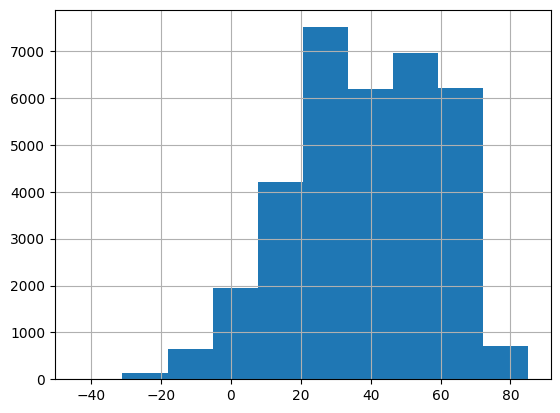

In [55]:
df["F"].hist()

<AxesSubplot: xlabel='    DATE'>

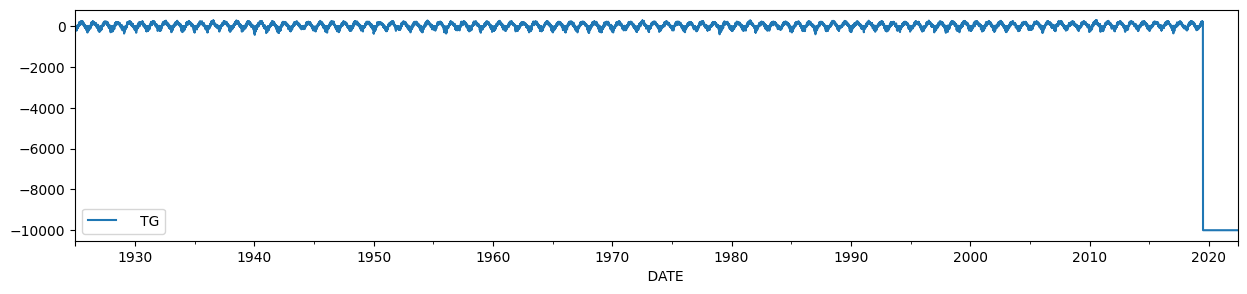

In [60]:
df.plot(x='    DATE', y='   TG', figsize=(15, 3))